## Introduction

There are many models for clustering out there. In this lab, we will be presenting the model that is considered the one of the simplest model among them. Despite its simplicity, *k*-means is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from unlabeled data.

Some real-world applications of *k*-means include:
- customer segmentation,
- understand what the visitors of a website are trying to accomplish,
- pattern recognition, and,
- data compression.

In this lab, we will learn *k*-means clustering with 3 examples:
- *k*-means on a randomly generated dataset.
- Using *k*-means for customer segmentation.

## Table of Contents

1. <a href="#item1"><em>k</em>-means on a Randomly Generated Dataset</a>    
2. <a href="#item2">Using <em>k</em> for Customer Segmentation</a> 

In [1]:
# Import libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported')

Libraries imported


### *k*-means on a Randomly Generated Dataset

Let's first demonstrate how *k*-means works with an example of engineered datapoints<br>
**30 data points belonging to 2 different clusters(x1 is the first feature and x2 is the second feature)**

In [2]:
# data
x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -
      2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -
      1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]

print('Datapoints defined!')

Datapoints defined!


**Define a function that assigns each datapoint to a cluster**

In [3]:
colors_map = np.array(['b', 'r'])
def assign_members(x1, x2, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points

print('assign_members function defined!')

assign_members function defined!


**Define a function that updates the centroid of each cluster**

In [4]:
# update means
def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return [center1, center2]

print('assign_members function defined!')

assign_members function defined!


**Define a function that plots the data points along with the cluster centroids**

In [5]:
def plot_points(centroids=None, colors='g', figure_title=None):
    # plot the figure
    fig = plt.figure(figsize=(15, 10))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    # define the ticks
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    # add labels to axes
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

print('plot_points function defined!')

plot_points function defined!


**Initialize k-means - plot data points**

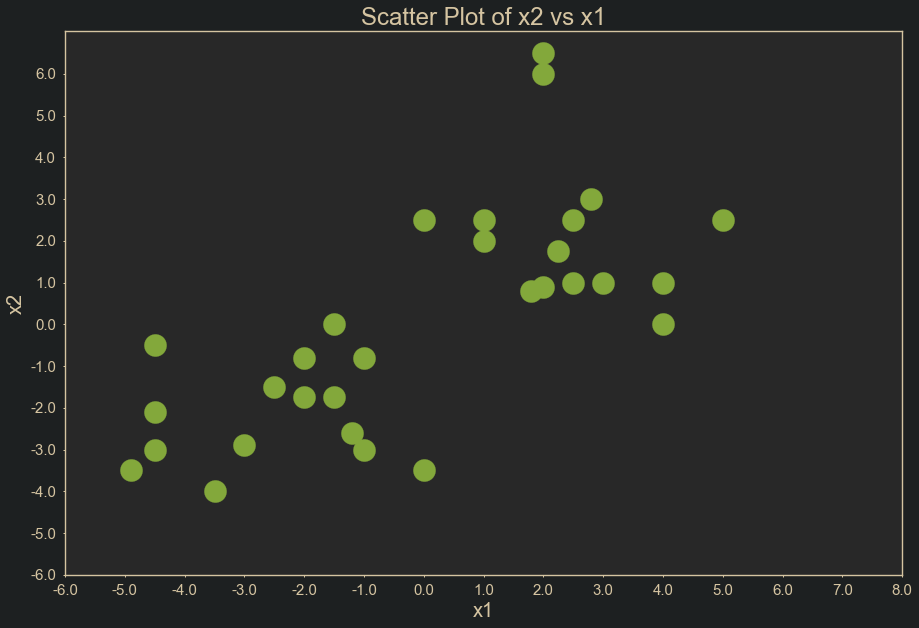

In [6]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

**Initialize *k*-means - randomly define clusters and add them to plot**

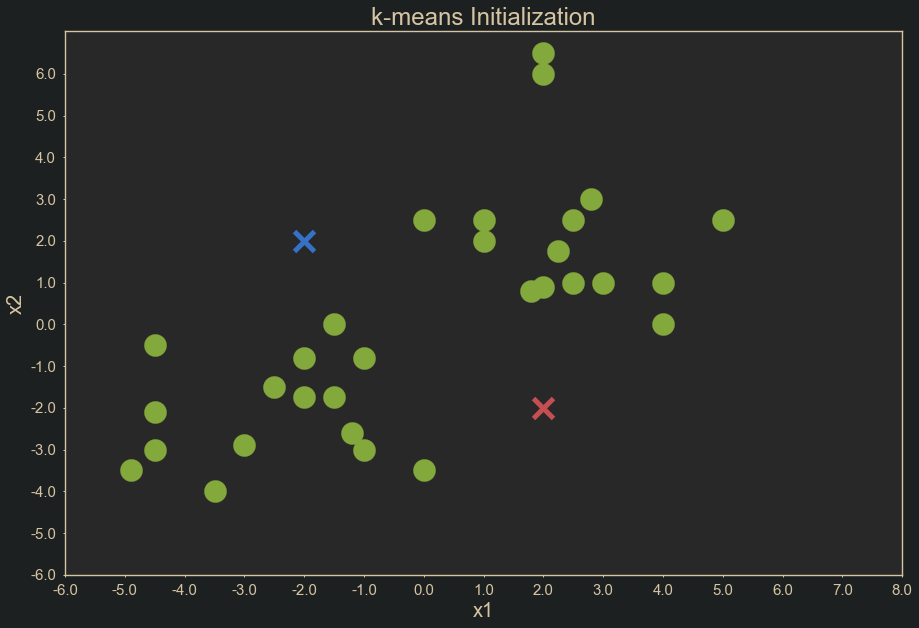

In [7]:
centers = [[-2, 2], [2, -2]]
plot_points(centers, figure_title='k-means Initialization')

#### Run *k*-means (4-iterations only)

Iteration 1 - Press Enter to update the members of each cluster


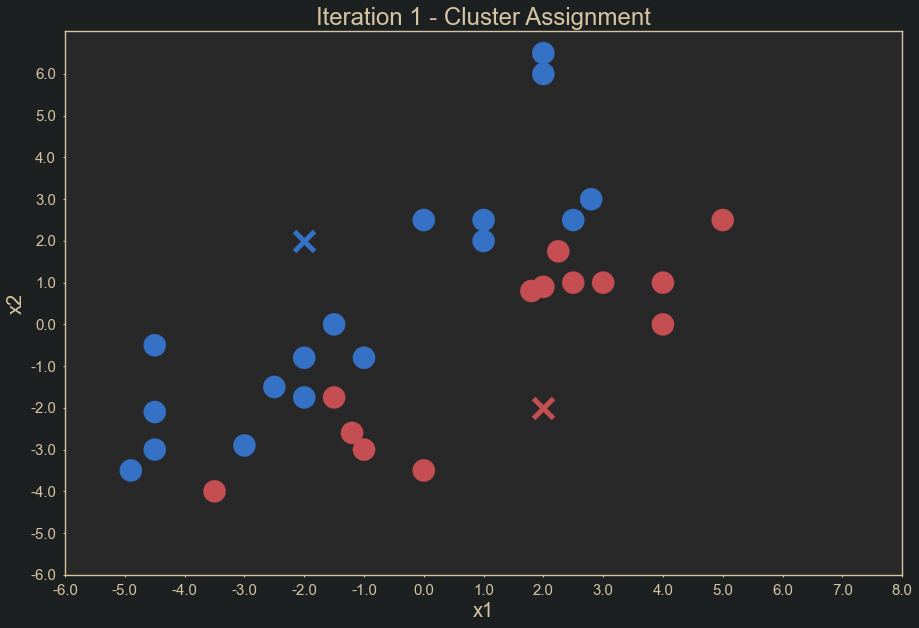

Iteration 1 - Press Enter to update the centers


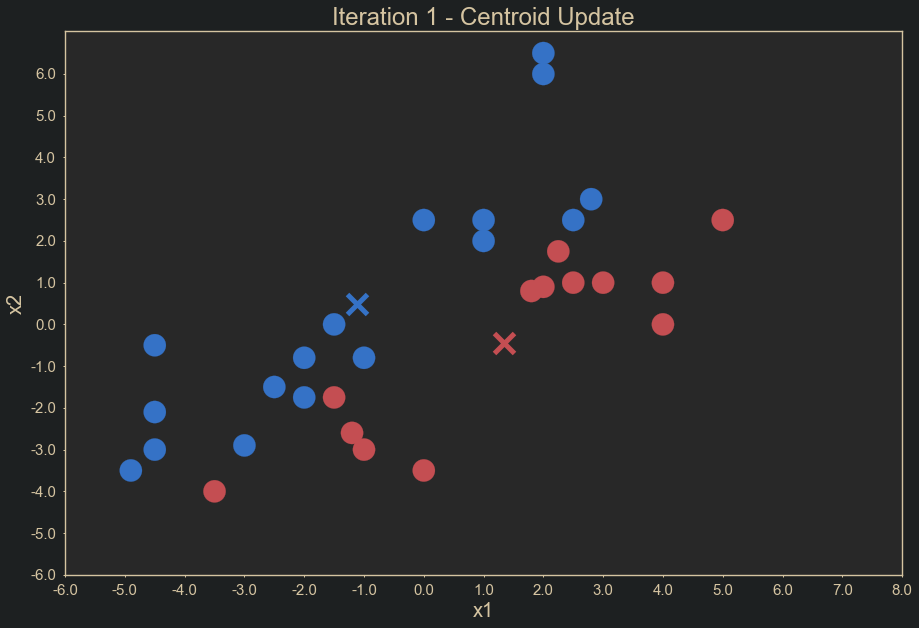

Iteration 2 - Press Enter to update the members of each cluster


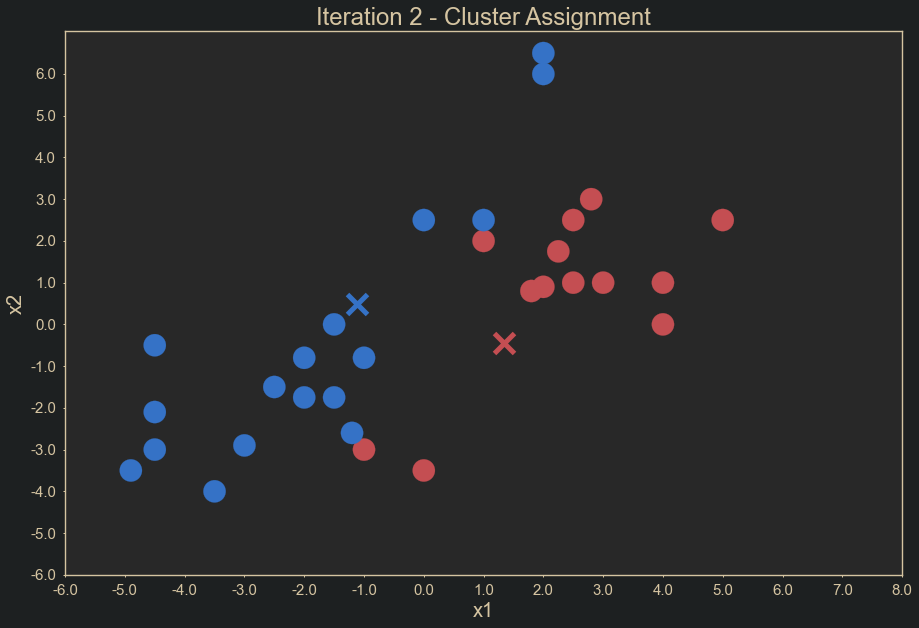

Iteration 2 - Press Enter to update the centers


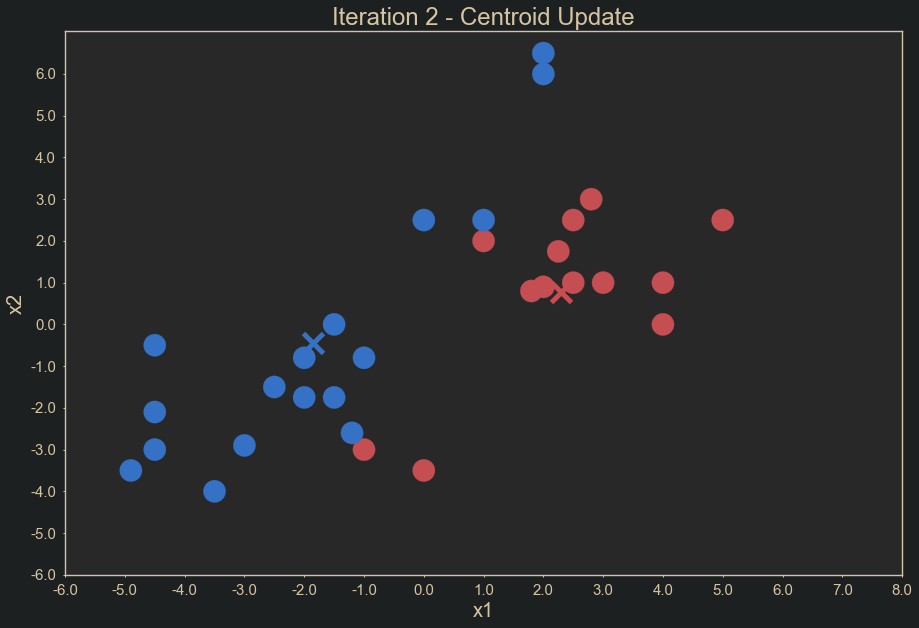

Iteration 3 - Press Enter to update the members of each cluster


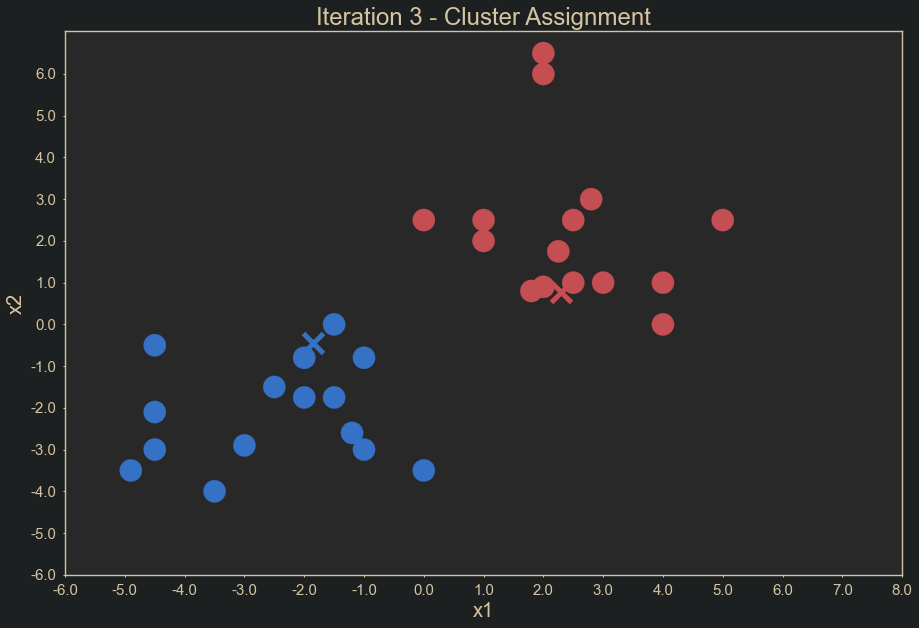

Iteration 3 - Press Enter to update the centers


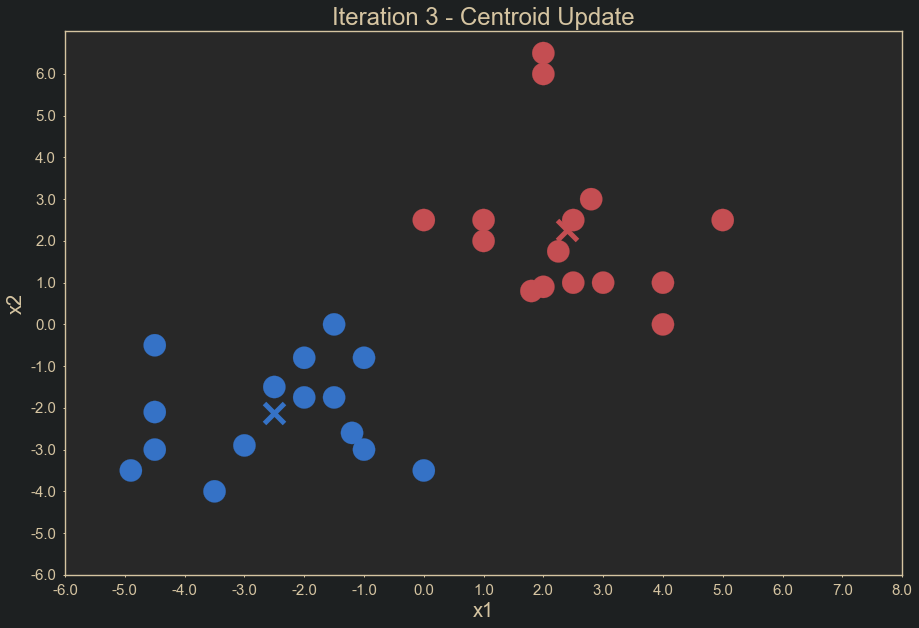

Iteration 4 - Press Enter to update the members of each cluster


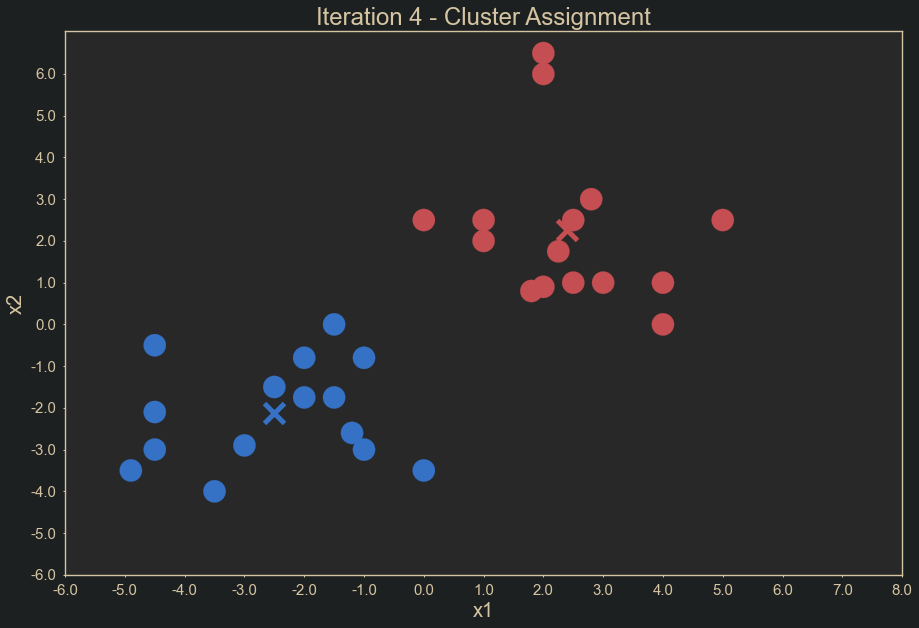

Iteration 4 - Press Enter to update the centers


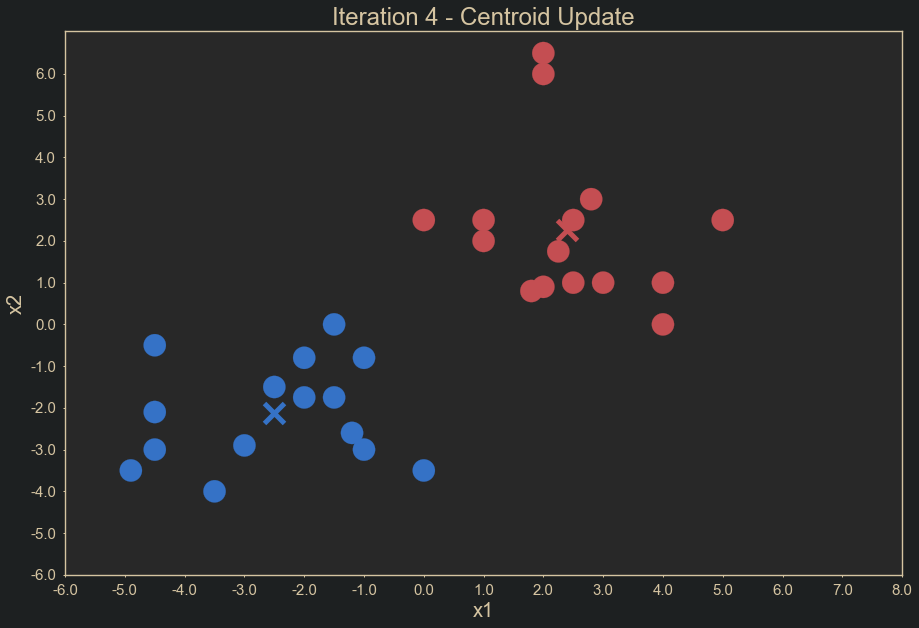

In [8]:
number_of_iterations = 4
for i in range(number_of_iterations):
    input('Iteration {} - Press Enter to update the members of each cluster'.format(i + 1))
    colors, class_of_points = assign_members(x1, x2, centers)
    title = 'Iteration {} - Cluster Assignment'.format(i + 1)
    plot_points(centers, colors, figure_title=title)
    input('Iteration {} - Press Enter to update the centers'.format(i + 1))
    centers = update_centers(x1, x2, class_of_points)
    title = 'Iteration {} - Centroid Update'.format(i + 1)
    plot_points(centers, colors, figure_title=title)

Now, we have visually observed how <em>k</em>-means works, let's look at an example with many more datapoints. For this example, we will use the <strong>random</strong> library to generate thousands of datapoints.

### Generating the Data
First, we need to set up a random seed. We use the Numpy's **random.seed()** function, and we will set the seed to 0. In other words, **random.seed(0)**.

In [11]:
np.random.seed(0)

Next we will be making *random clusters* of points by using the **make_blobs** class. The **make_blobs** class can take in many inputs, but we will use these specific ones.

<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>

<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>



In [13]:
X, y = make_blobs(n_samples=5000, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

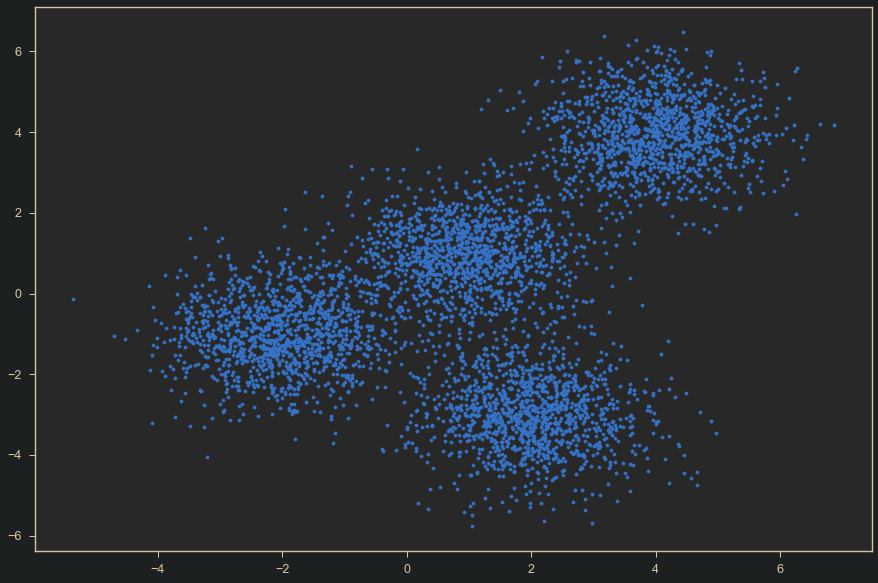

In [19]:
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.show()

### Setting up *k*-means

Now that we have our random data, let's set up our *k*-means clustering.

The KMeans class has many parameters that can be used, but we will use these three:
<ul>
    <li> <strong>init</strong>: Initialization method of the centroids. </li>
m    <ul>
        <li> Value will be: "k-means++". k-means++ selects initial cluster centers for <em>k</em>-means clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <strong>n_clusters</strong>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <strong>n_init</strong>: Number of times the <em>k</em>-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called **k_means**.

In [20]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)